In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Reading the csv file using pandas
df = pd.read_csv("/content/drive/MyDrive/office intern/complaints_processed.csv")

In [4]:
#displaying the first five rows
df.head()

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


In [5]:
#shape/size of the dataframe
df.shape

(162421, 3)

In [6]:
#Finding the null values
df.isna().sum()

Unnamed: 0     0
product        0
narrative     10
dtype: int64

In [7]:
#Dropping the duplicates from dataframe
df.drop_duplicates(keep = "first", ignore_index=True, inplace=True)

In [8]:
#Dropping the unnamed column
df.drop(["Unnamed: 0"], axis = 1, inplace =True)

In [9]:
#Dropping NA values
df.dropna(axis=0, inplace=True)

In [10]:
#Printing the count of each class
df.groupby(["product"]).count()

,narrative
product,
credit_card,15566
credit_reporting,91172
debt_collection,23148
mortgages_and_loans,18990
retail_banking,13535


Visualization

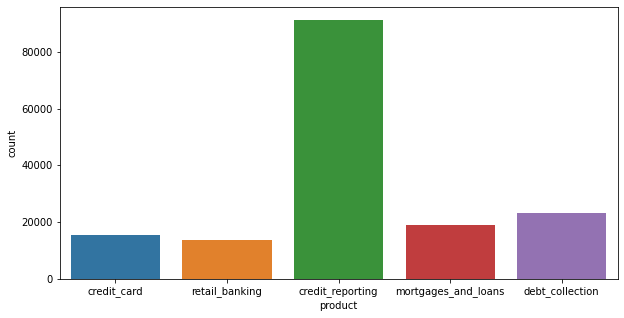

In [11]:
#Bar graph for visualization
plt.figure(figsize = (10,5))
sns.countplot(x=df['product'],data=df)
plt.show()

In [12]:
#Stopword removal
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
STOPWORDS = set(stopwords.words('english'))
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [14]:
#Using regular expression for punctuation removal
import re
replace_symbols = re.compile('[/(){}\[\]\|@,;]')
Replace_signs = re.compile('[^0-9a-z #+_]')

In [15]:
#Pre processing by defining a function and converting to lowercase, removing stopwords and punctuations
def cleaning(text):
  text = text.lower()
  text = replace_symbols.sub(' ', text)
  text = Replace_signs.sub(' ', text)
  text = text.replace('x','')
  text = ' '.join(word for word in text.split() if word not in STOPWORDS)

  return text
df['narrative'] = df['narrative'].apply(cleaning)

In [16]:
df['narrative']

0         purchase order day shipping amount receive pro...
1         forwarded message date tue subject please inve...
2         forwarded message cc sent friday pdt subject f...
3         payment history missing credit report speciali...
4         payment history missing credit report made mis...
                                ...                        
162416                                                 name
162417                                                 name
162418                                                 name
162419                                                 name
162420                                                 name
Name: narrative, Length: 162411, dtype: object

In [17]:
df.tail(10)

,product,narrative
162411,retail_banking,zelle suspended account without cause banking ...
162412,debt_collection,zero contact made debt supposedly resolved fou...
162413,mortgages_and_loans,zillow home loan nmls nmls actual quote provid...
162414,debt_collection,zuntafi sent notice willing settle defaulted s...
162415,debt_collection,name
162416,debt_collection,name
162417,credit_card,name
162418,debt_collection,name
162419,credit_card,name
162420,credit_reporting,name


In [18]:
df.drop(df.tail(6).index, inplace=True)

In [19]:
#Tokenization
from nltk.tokenize import RegexpTokenizer

In [20]:
tokenizer = RegexpTokenizer(r'\w+') 
#\w+ matches any word character (equal to [a-zA-Z0-9_]) 
#+ Quantifier — Matches between one and unlimited times, as many times as possible, giving back as needed
df['token'] = df['narrative'].apply(tokenizer.tokenize)

In [21]:
print(df['token'])

0         [purchase, order, day, shipping, amount, recei...
1         [forwarded, message, date, tue, subject, pleas...
2         [forwarded, message, cc, sent, friday, pdt, su...
3         [payment, history, missing, credit, report, sp...
4         [payment, history, missing, credit, report, ma...
                                ...                        
162410    [zales, comenity, bank, closed, sold, account,...
162411    [zelle, suspended, account, without, cause, ba...
162412    [zero, contact, made, debt, supposedly, resolv...
162413    [zillow, home, loan, nmls, nmls, actual, quote...
162414    [zuntafi, sent, notice, willing, settle, defau...
Name: token, Length: 162405, dtype: object


In [22]:
#Tokenizing
from keras.preprocessing.text import Tokenizer
max_words = 2000
max_len = 250
tokenizer = Tokenizer(num_words=2000, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['token'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 44809 unique tokens.


In [30]:
#Padding the sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
X = tokenizer.texts_to_sequences(df['token'].values)
X = pad_sequences(X, maxlen=max_len)

In [26]:
X

array([[   0,    0,    0, ...,  170,  309, 1440],
       [   0,    0,    0, ...,  104,  434,  300],
       [   0,    0,    0, ...,    5,  183,  164],
       ...,
       [   0,    0,    0, ...,   79,   13,  306],
       [   0,    0,    0, ..., 1217,   60,  960],
       [   0,    0,    0, ...,    9, 1534,  748]], dtype=int32)

In [27]:
X.shape

(162405, 250)

In [28]:
Y = pd.get_dummies(df['product']).values

In [29]:
Y.shape

(162405, 5)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
#Splitting the data into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(113683, 250) (113683, 5)
(48722, 250) (48722, 5)
